<a href="https://colab.research.google.com/github/elizabethyoo/team_9/blob/main/SBPS_indexlevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/DS4A/Group 9 Project Documents'

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,10
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
combo_df = pd.read_csv('/content/drive/MyDrive/DS4A/Datasets /business_pulse/combined_indexes.csv')

In [5]:
combo_df.head()

,ST,NAICS_SECTOR,INDEX_NAME,ESTIMATE_PERCENTAGE,DATE_START,DATE_END
0,-,-,Expected recovery index,-0.58,2020-04-26,2020-05-02
1,-,-,Financial stress index,-0.39,2020-04-26,2020-05-02
2,-,-,Operational challenges index,-0.45,2020-04-26,2020-05-02
3,-,-,Overall sentiment index,-0.69,2020-04-26,2020-05-02
4,-,11,Expected recovery index,-0.49,2020-04-26,2020-05-02


In [6]:
combo_df.tail()

,ST,NAICS_SECTOR,INDEX_NAME,ESTIMATE_PERCENTAGE,DATE_START,DATE_END
13577,WV,-,Overall sentiment index,-0.35,2021-09-27,2021-10-03
13578,WY,-,Expected recovery index,-0.40,2021-09-27,2021-10-03
13579,WY,-,Market challenges index,0.09,2021-09-27,2021-10-03
13580,WY,-,Operational challenges index,-0.16,2021-09-27,2021-10-03
13581,WY,-,Overall sentiment index,-0.25,2021-09-27,2021-10-03


In [7]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13582 entries, 0 to 13581
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ST                   13582 non-null  object 
 1   NAICS_SECTOR         13582 non-null  object 
 2   INDEX_NAME           13582 non-null  object 
 3   ESTIMATE_PERCENTAGE  13582 non-null  float64
 4   DATE_START           13582 non-null  object 
 5   DATE_END             13582 non-null  object 
dtypes: float64(1), object(5)
memory usage: 636.8+ KB


In [8]:
Filter1 = (combo_df.ST != "-") & (combo_df.NAICS_SECTOR == '-')

In [9]:
combo_df_state = combo_df[Filter1]
combo_df_state.tail()

,ST,NAICS_SECTOR,INDEX_NAME,ESTIMATE_PERCENTAGE,DATE_START,DATE_END
13577,WV,-,Overall sentiment index,-0.35,2021-09-27,2021-10-03
13578,WY,-,Expected recovery index,-0.40,2021-09-27,2021-10-03
13579,WY,-,Market challenges index,0.09,2021-09-27,2021-10-03
13580,WY,-,Operational challenges index,-0.16,2021-09-27,2021-10-03
13581,WY,-,Overall sentiment index,-0.25,2021-09-27,2021-10-03


In [10]:
combo_df_state

,ST,NAICS_SECTOR,INDEX_NAME,ESTIMATE_PERCENTAGE,DATE_START,DATE_END
80,AK,-,Expected recovery index,-0.59,2020-04-26,2020-05-02
81,AK,-,Financial stress index,-0.36,2020-04-26,2020-05-02
82,AK,-,Operational challenges index,-0.39,2020-04-26,2020-05-02
83,AK,-,Overall sentiment index,-0.66,2020-04-26,2020-05-02
84,AL,-,Expected recovery index,-0.51,2020-04-26,2020-05-02
...,...,...,...,...,...,...
13577,WV,-,Overall sentiment index,-0.35,2021-09-27,2021-10-03
13578,WY,-,Expected recovery index,-0.40,2021-09-27,2021-10-03
13579,WY,-,Market challenges index,0.09,2021-09-27,2021-10-03
13580,WY,-,Operational challenges index,-0.16,2021-09-27,2021-10-03


In [11]:
combo_df_state[combo_df_state.INDEX_NAME == "Overall sentiment index"]

,ST,NAICS_SECTOR,INDEX_NAME,ESTIMATE_PERCENTAGE,DATE_START,DATE_END
83,AK,-,Overall sentiment index,-0.66,2020-04-26,2020-05-02
87,AL,-,Overall sentiment index,-0.58,2020-04-26,2020-05-02
91,AR,-,Overall sentiment index,-0.64,2020-04-26,2020-05-02
95,AZ,-,Overall sentiment index,-0.68,2020-04-26,2020-05-02
99,CA,-,Overall sentiment index,-0.73,2020-04-26,2020-05-02
...,...,...,...,...,...,...
13565,VT,-,Overall sentiment index,-0.43,2021-09-27,2021-10-03
13569,WA,-,Overall sentiment index,-0.36,2021-09-27,2021-10-03
13573,WI,-,Overall sentiment index,-0.36,2021-09-27,2021-10-03
13577,WV,-,Overall sentiment index,-0.35,2021-09-27,2021-10-03


In [12]:
OverallFilter = combo_df_state.INDEX_NAME == "Overall sentiment index"
Overall_state_df = combo_df_state[OverallFilter]

In [13]:
Overall_state_df

,ST,NAICS_SECTOR,INDEX_NAME,ESTIMATE_PERCENTAGE,DATE_START,DATE_END
83,AK,-,Overall sentiment index,-0.66,2020-04-26,2020-05-02
87,AL,-,Overall sentiment index,-0.58,2020-04-26,2020-05-02
91,AR,-,Overall sentiment index,-0.64,2020-04-26,2020-05-02
95,AZ,-,Overall sentiment index,-0.68,2020-04-26,2020-05-02
99,CA,-,Overall sentiment index,-0.73,2020-04-26,2020-05-02
...,...,...,...,...,...,...
13565,VT,-,Overall sentiment index,-0.43,2021-09-27,2021-10-03
13569,WA,-,Overall sentiment index,-0.36,2021-09-27,2021-10-03
13573,WI,-,Overall sentiment index,-0.36,2021-09-27,2021-10-03
13577,WV,-,Overall sentiment index,-0.35,2021-09-27,2021-10-03


In [ ]:
#Group by if you want at national level
#Overall_state_df = Overall_state_df.groupby(['DATE_START'], as_index=False).mean()

In [14]:
Overall_state_df = Overall_state_df.drop(columns=['NAICS_SECTOR', 'DATE_END'])
Overall_state_df

,ST,INDEX_NAME,ESTIMATE_PERCENTAGE,DATE_START
83,AK,Overall sentiment index,-0.66,2020-04-26
87,AL,Overall sentiment index,-0.58,2020-04-26
91,AR,Overall sentiment index,-0.64,2020-04-26
95,AZ,Overall sentiment index,-0.68,2020-04-26
99,CA,Overall sentiment index,-0.73,2020-04-26
...,...,...,...,...
13565,VT,Overall sentiment index,-0.43,2021-09-27
13569,WA,Overall sentiment index,-0.36,2021-09-27
13573,WI,Overall sentiment index,-0.36,2021-09-27
13577,WV,Overall sentiment index,-0.35,2021-09-27


In [15]:
Overall_state_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704 entries, 83 to 13581
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ST                   2704 non-null   object 
 1   INDEX_NAME           2704 non-null   object 
 2   ESTIMATE_PERCENTAGE  2704 non-null   float64
 3   DATE_START           2704 non-null   object 
dtypes: float64(1), object(3)
memory usage: 105.6+ KB


In [16]:
Overall = Overall_state_df.pivot("ST", "DATE_START", "ESTIMATE_PERCENTAGE")
#row_order = ['Large negative effect', 'Moderate negative effect', 'Little or no effect', 'Moderate positive effect', 'Large positive effect']
#Overall = Overall.reindex(row_order, axis=0) #reindexing rows in the order from largest negative to largest positive impact
Overall

DATE_START,2020-04-26,2020-05-03,2020-05-10,2020-05-17,2020-05-24,2020-05-31,2020-06-07,2020-06-14,2020-06-21,2020-08-09,2020-08-16,2020-08-23,2020-08-30,2020-09-06,2020-09-13,2020-09-20,2020-09-27,2020-10-04,2020-11-09,2020-11-16,2020-11-23,2020-11-30,2020-12-07,2020-12-14,2020-12-21,2020-12-28,2021-01-04,2021-02-15,2021-02-22,2021-03-01,2021-03-08,2021-03-15,2021-03-22,2021-03-29,2021-04-04,2021-04-12,2021-05-17,2021-05-24,2021-05-31,2021-06-07,2021-06-14,2021-06-21,2021-06-28,2021-07-05,2021-07-12,2021-08-16,2021-08-23,2021-08-30,2021-09-06,2021-09-13,2021-09-20,2021-09-27
ST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,-0.66,-0.67,-0.69,-0.70,-0.55,-0.62,-0.49,-0.61,-0.56,-0.59,-0.50,-0.59,-0.62,-0.45,-0.48,-0.58,-0.52,-0.60,-0.59,-0.56,-0.58,-0.56,-0.56,-0.56,-0.53,-0.46,-0.54,-0.48,-0.42,-0.56,-0.50,-0.49,-0.51,-0.44,-0.48,-0.51,-0.45,-0.39,-0.46,-0.48,-0.46,-0.40,-0.47,-0.44,-0.52,-0.45,-0.44,-0.47,-0.50,-0.45,-0.39,-0.34
AL,-0.58,-0.56,-0.57,-0.53,-0.56,-0.52,-0.52,-0.51,-0.50,-0.44,-0.46,-0.44,-0.41,-0.46,-0.38,-0.44,-0.46,-0.45,-0.42,-0.41,-0.39,-0.41,-0.44,-0.42,-0.49,-0.48,-0.43,-0.43,-0.42,-0.37,-0.36,-0.41,-0.39,-0.39,-0.39,-0.35,-0.41,-0.47,-0.36,-0.34,-0.36,-0.32,-0.47,-0.41,-0.39,-0.41,-0.46,-0.39,-0.38,-0.45,-0.37,-0.43
AR,-0.64,-0.57,-0.53,-0.58,-0.51,-0.52,-0.52,-0.43,-0.51,-0.45,-0.40,-0.47,-0.46,-0.35,-0.39,-0.25,-0.31,-0.37,-0.41,-0.36,-0.41,-0.41,-0.36,-0.41,-0.38,-0.38,-0.38,-0.43,-0.39,-0.43,-0.35,-0.39,-0.35,-0.24,-0.33,-0.31,-0.32,-0.30,-0.38,-0.36,-0.34,-0.31,-0.27,-0.30,-0.33,-0.26,-0.35,-0.34,-0.35,-0.33,-0.33,-0.26
AZ,-0.68,-0.61,-0.57,-0.57,-0.54,-0.53,-0.52,-0.51,-0.54,-0.52,-0.45,-0.42,-0.42,-0.47,-0.43,-0.47,-0.43,-0.44,-0.44,-0.41,-0.41,-0.43,-0.43,-0.43,-0.44,-0.40,-0.45,-0.45,-0.41,-0.36,-0.40,-0.39,-0.44,-0.37,-0.36,-0.40,-0.42,-0.30,-0.34,-0.36,-0.38,-0.38,-0.34,-0.30,-0.34,-0.36,-0.37,-0.30,-0.37,-0.40,-0.38,-0.38
CA,-0.73,-0.70,-0.67,-0.67,-0.65,-0.66,-0.63,-0.61,-0.62,-0.56,-0.54,-0.56,-0.54,-0.54,-0.53,-0.53,-0.54,-0.53,-0.51,-0.50,-0.53,-0.52,-0.52,-0.52,-0.53,-0.52,-0.54,-0.51,-0.51,-0.51,-0.50,-0.49,-0.50,-0.47,-0.48,-0.49,-0.45,-0.47,-0.45,-0.45,-0.46,-0.45,-0.46,-0.44,-0.46,-0.45,-0.45,-0.45,-0.43,-0.45,-0.44,-0.44
CO,-0.63,-0.65,-0.61,-0.61,-0.57,-0.56,-0.54,-0.56,-0.56,-0.51,-0.45,-0.48,-0.44,-0.43,-0.44,-0.45,-0.42,-0.44,-0.47,-0.45,-0.46,-0.44,-0.46,-0.45,-0.46,-0.47,-0.45,-0.43,-0.42,-0.41,-0.40,-0.43,-0.42,-0.41,-0.42,-0.43,-0.40,-0.39,-0.40,-0.37,-0.37,-0.37,-0.38,-0.38,-0.37,-0.41,-0.37,-0.39,-0.37,-0.38,-0.40,-0.40
CT,-0.74,-0.65,-0.71,-0.58,-0.63,-0.61,-0.54,-0.61,-0.56,-0.55,-0.51,-0.51,-0.52,-0.53,-0.56,-0.47,-0.47,-0.50,-0.45,-0.44,-0.46,-0.50,-0.55,-0.52,-0.46,-0.45,-0.52,-0.46,-0.44,-0.48,-0.50,-0.47,-0.47,-0.44,-0.38,-0.37,-0.46,-0.40,-0.39,-0.39,-0.42,-0.44,-0.39,-0.36,-0.38,-0.36,-0.38,-0.34,-0.42,-0.40,-0.38,-0.37
DC,-0.72,-0.74,-0.69,-0.63,-0.64,-0.61,-0.68,-0.66,-0.72,-0.62,-0.54,-0.57,-0.71,-0.44,-0.59,-0.62,-0.62,-0.59,-0.54,-0.51,-0.57,-0.59,-0.56,-0.55,-0.62,-0.63,-0.60,-0.57,-0.51,-0.60,-0.60,-0.45,-0.55,-0.51,-0.58,-0.56,-0.45,-0.44,-0.55,-0.51,-0.47,-0.37,-0.46,-0.56,-0.45,-0.49,-0.41,-0.46,-0.53,-0.46,-0.44,-0.48
DE,-0.65,-0.66,-0.65,-0.69,-0.69,-0.62,-0.57,-0.59,-0.60,-0.57,-0.52,-0.50,-0.49,-0.51,-0.52,-0.44,-0.45,-0.39,-0.47,-0.48,-0.41,-0.50,-0.41,-0.46,-0.39,-0.54,-0.37,-0.49,-0.46,-0.36,-0.42,-0.43,-0.38,-0.43,-0.41,-0.33,-0.44,-0.44,-0.34,-0.43,-0.34,-0.38,-0.30,-0.45,-0.38,-0.47,-0.44,-0.34,-0.44,-0.29,-0.46,-0.28


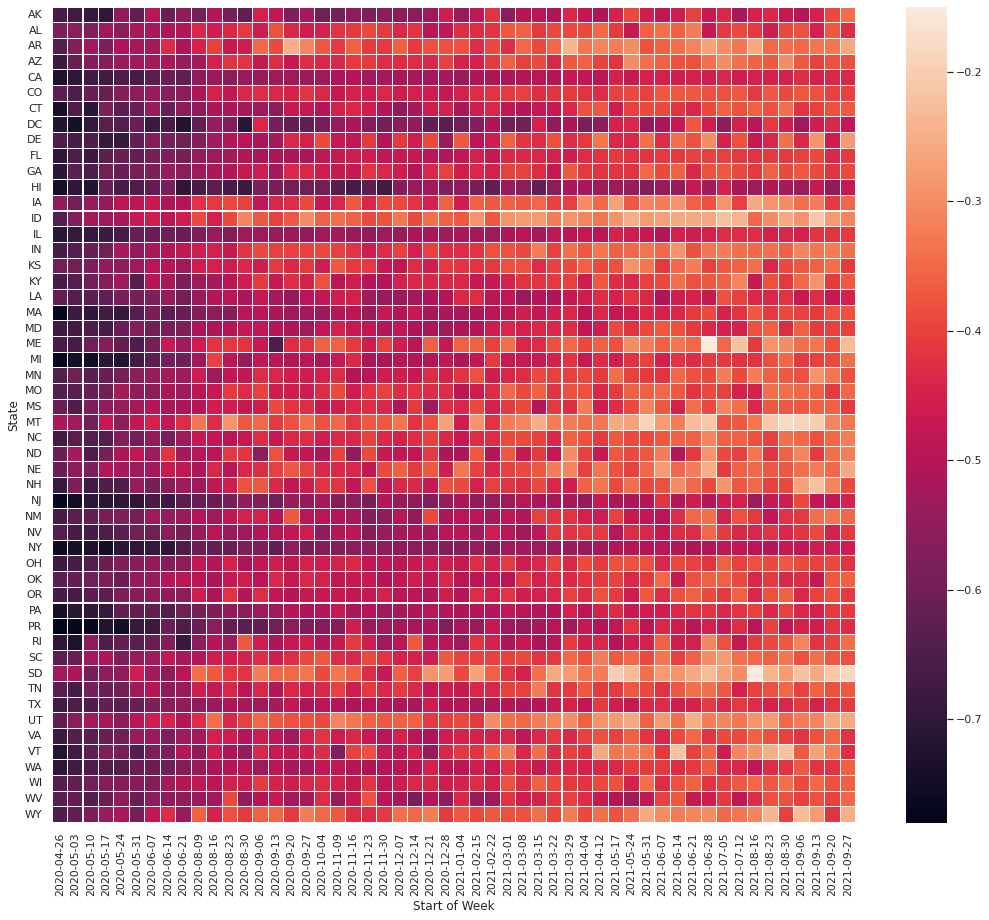

In [24]:
# figure size in inches
sns.set(rc={'figure.figsize':(18,15)})
heatmap = sns.heatmap(Overall, linewidths=.05)
plt.xlabel("Start of Week")
plt.ylabel("State")
plt.show()

In [14]:
ReturnNormalFilter = combo_df_state.INDEX_NAME == "Expected recovery index"
ReturnNormal_state_df = combo_df_state[ReturnNormalFilter]
ReturnNormal_state_df = ReturnNormal_state_df.drop(columns=['NAICS_SECTOR', 'DATE_END'])
ReturnNormal_state_df

,ST,INDEX_NAME,ESTIMATE_PERCENTAGE,DATE_START
80,AK,Expected recovery index,-0.59,2020-04-26
84,AL,Expected recovery index,-0.51,2020-04-26
88,AR,Expected recovery index,-0.54,2020-04-26
92,AZ,Expected recovery index,-0.58,2020-04-26
96,CA,Expected recovery index,-0.62,2020-04-26
...,...,...,...,...
13562,VT,Expected recovery index,-0.50,2021-09-27
13566,WA,Expected recovery index,-0.50,2021-09-27
13570,WI,Expected recovery index,-0.45,2021-09-27
13574,WV,Expected recovery index,-0.45,2021-09-27


In [15]:
ERI = ReturnNormal_state_df.pivot("ST", "DATE_START", "ESTIMATE_PERCENTAGE")
#row_order = ['Large negative effect', 'Moderate negative effect', 'Little or no effect', 'Moderate positive effect', 'Large positive effect']
#Overall = Overall.reindex(row_order, axis=0) #reindexing rows in the order from largest negative to largest positive impact
ERI.head()

DATE_START,2020-04-26,2020-05-03,2020-05-10,2020-05-17,2020-05-24,2020-05-31,2020-06-07,2020-06-14,2020-06-21,2020-08-09,2020-08-16,2020-08-23,2020-08-30,2020-09-06,2020-09-13,2020-09-20,2020-09-27,2020-10-04,2020-11-09,2020-11-16,2020-11-23,2020-11-30,2020-12-07,2020-12-14,2020-12-21,2020-12-28,2021-01-04,2021-02-15,2021-02-22,2021-03-01,2021-03-08,2021-03-15,2021-03-22,2021-03-29,2021-04-04,2021-04-12,2021-05-17,2021-05-24,2021-05-31,2021-06-07,2021-06-14,2021-06-21,2021-06-28,2021-07-05,2021-07-12,2021-08-16,2021-08-23,2021-08-30,2021-09-06,2021-09-13,2021-09-20,2021-09-27
ST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,-0.59,-0.57,-0.60,-0.61,-0.53,-0.66,-0.60,-0.65,-0.57,-0.63,-0.56,-0.60,-0.59,-0.57,-0.53,-0.60,-0.62,-0.55,-0.63,-0.62,-0.59,-0.60,-0.61,-0.56,-0.66,-0.52,-0.57,-0.57,-0.56,-0.62,-0.56,-0.55,-0.53,-0.44,-0.53,-0.56,-0.47,-0.52,-0.56,-0.47,-0.44,-0.39,-0.39,-0.41,-0.42,-0.54,-0.57,-0.59,-0.45,-0.51,-0.45,-0.44
AL,-0.51,-0.50,-0.52,-0.56,-0.58,-0.55,-0.52,-0.51,-0.57,-0.52,-0.51,-0.49,-0.49,-0.50,-0.43,-0.49,-0.48,-0.47,-0.48,-0.45,-0.48,-0.49,-0.49,-0.53,-0.53,-0.53,-0.53,-0.55,-0.50,-0.48,-0.46,-0.50,-0.42,-0.42,-0.42,-0.40,-0.46,-0.48,-0.38,-0.40,-0.43,-0.33,-0.42,-0.43,-0.39,-0.48,-0.48,-0.44,-0.49,-0.49,-0.40,-0.43
AR,-0.54,-0.54,-0.51,-0.54,-0.57,-0.59,-0.58,-0.50,-0.60,-0.52,-0.52,-0.47,-0.50,-0.50,-0.46,-0.44,-0.39,-0.47,-0.45,-0.50,-0.47,-0.55,-0.48,-0.46,-0.42,-0.49,-0.52,-0.54,-0.48,-0.45,-0.47,-0.43,-0.40,-0.32,-0.42,-0.46,-0.41,-0.38,-0.40,-0.42,-0.36,-0.37,-0.32,-0.41,-0.40,-0.42,-0.43,-0.42,-0.46,-0.39,-0.43,-0.36
AZ,-0.58,-0.54,-0.54,-0.59,-0.56,-0.57,-0.57,-0.55,-0.60,-0.58,-0.54,-0.52,-0.50,-0.54,-0.50,-0.50,-0.50,-0.50,-0.52,-0.52,-0.50,-0.52,-0.52,-0.54,-0.52,-0.52,-0.52,-0.54,-0.48,-0.47,-0.46,-0.50,-0.48,-0.45,-0.45,-0.48,-0.48,-0.39,-0.40,-0.41,-0.42,-0.41,-0.38,-0.40,-0.39,-0.47,-0.41,-0.42,-0.46,-0.48,-0.45,-0.43
CA,-0.62,-0.60,-0.61,-0.68,-0.66,-0.66,-0.64,-0.64,-0.66,-0.61,-0.61,-0.61,-0.61,-0.60,-0.60,-0.60,-0.59,-0.59,-0.60,-0.60,-0.60,-0.60,-0.61,-0.60,-0.61,-0.61,-0.62,-0.61,-0.60,-0.59,-0.57,-0.57,-0.56,-0.56,-0.56,-0.55,-0.52,-0.52,-0.51,-0.50,-0.51,-0.49,-0.49,-0.49,-0.50,-0.52,-0.53,-0.53,-0.53,-0.52,-0.52,-0.52


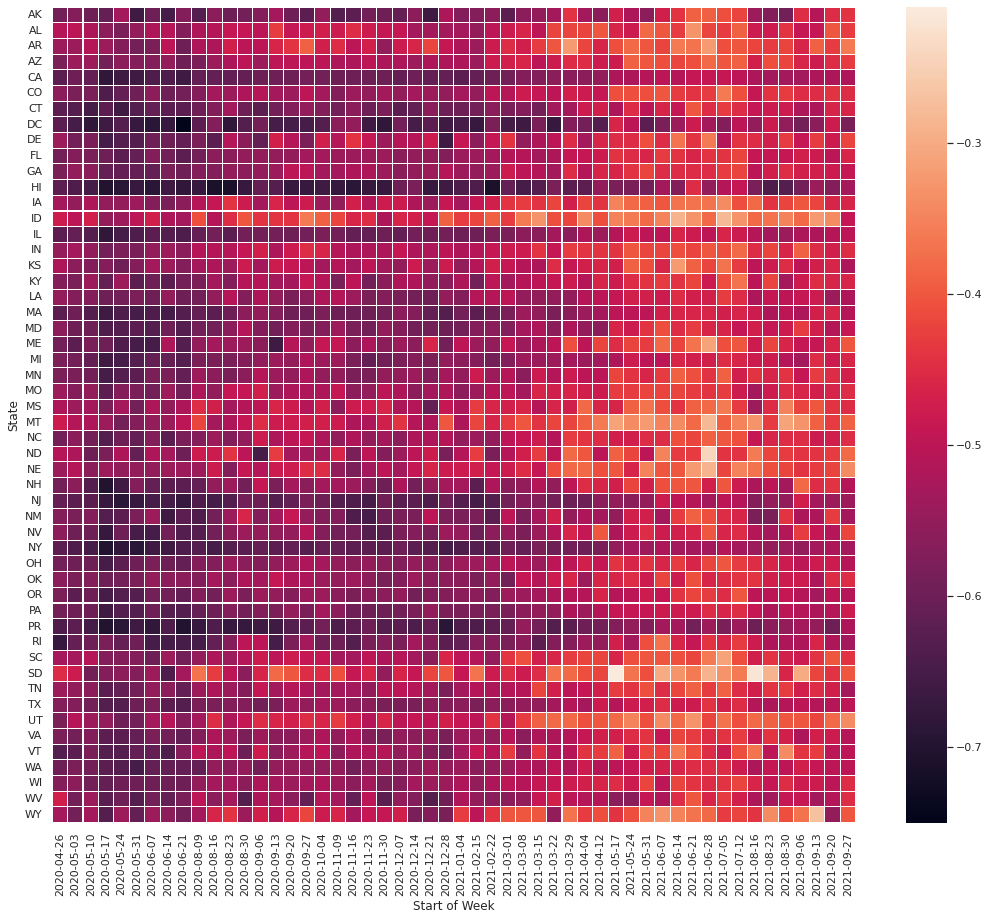

In [16]:
# figure size in inches
sns.set(rc={'figure.figsize':(18,15)})
heatmap = sns.heatmap(ERI, linewidths=.05)
plt.xlabel("Start of Week")
plt.ylabel("State")
plt.show()

In [20]:
#correlation between OSI and ERI 
#first let's plot the scatter plot
#take the original df and pivot the indexes to become their own columns 
df = combo_df_state.drop(columns=['DATE_END', 'NAICS_SECTOR'])

In [21]:
df.head()

,ST,INDEX_NAME,ESTIMATE_PERCENTAGE,DATE_START
80,AK,Expected recovery index,-0.59,2020-04-26
81,AK,Financial stress index,-0.36,2020-04-26
82,AK,Operational challenges index,-0.39,2020-04-26
83,AK,Overall sentiment index,-0.66,2020-04-26
84,AL,Expected recovery index,-0.51,2020-04-26


In [28]:
df = df.pivot(index=['DATE_START','ST'], columns=['INDEX_NAME'], values='ESTIMATE_PERCENTAGE')

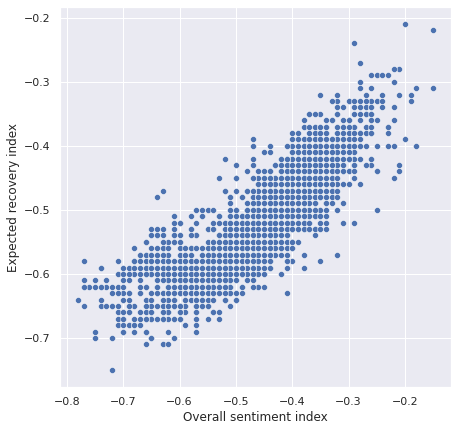

In [33]:
sns.set(rc={'figure.figsize':(7,7)})
sns.scatterplot(data=df, y='Expected recovery index', x='Overall sentiment index')

In [30]:
df.head()

INDEX_NAME     Expected recovery index  ...  Overall sentiment index
DATE_START ST                           ...                         
2020-04-26 AK                    -0.59  ...                    -0.66
           AL                    -0.51  ...                    -0.58
           AR                    -0.54  ...                    -0.64
           AZ                    -0.58  ...                    -0.68
           CA                    -0.62  ...                    -0.73

[5 rows x 6 columns]

In [31]:
df.corr()

INDEX_NAME,Expected recovery index,Financial stress index,Market challenges index,Market(s) challenges index,Operational challenges index,Overall sentiment index
INDEX_NAME,,,,,,
Expected recovery index,1.000000,0.521082,0.426856,0.550243,0.501076,0.846946
Financial stress index,0.521082,1.000000,NaN,NaN,0.709080,0.739862
Market challenges index,0.426856,NaN,1.000000,NaN,0.054698,0.538348
Market(s) challenges index,0.550243,NaN,NaN,1.000000,0.136527,0.633954
Operational challenges index,0.501076,0.709080,0.054698,0.136527,1.000000,0.642393
Overall sentiment index,0.846946,0.739862,0.538348,0.633954,0.642393,1.000000


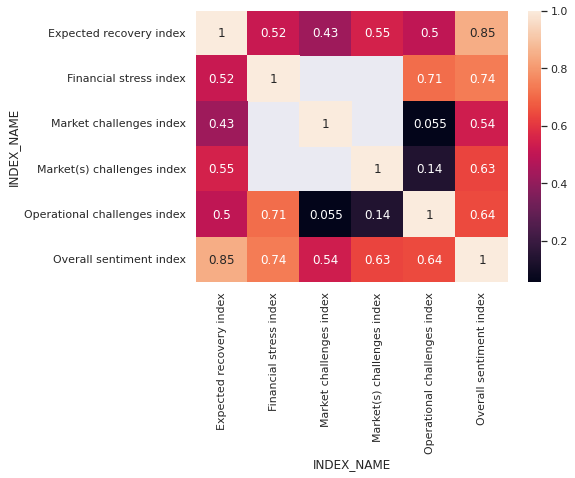

In [37]:
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(df.corr(), annot=True)

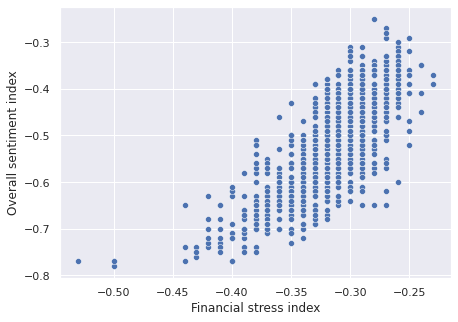

In [39]:
# let's take a look at how financial stress affects the overall sentiment
sns.scatterplot(data=df, x='Financial stress index', y='Overall sentiment index')

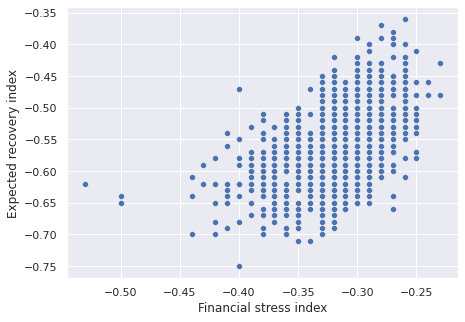

In [40]:
sns.scatterplot(data=df, x='Financial stress index', y='Expected recovery index')